# Credit Card Fraud Detection
## It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


*   The dataset contains transactions made by credit cards in September 2013 by European cardholders.
*   This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

https://www.kaggle.com/karthik7395/credit-card-fraud-detection-model/data

# **Comprensión de los datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dataset = pd.read_csv('creditcard.csv', header = 0)
dataset.head()

Columns Information:


*   Time: Time of the transaction (Counted in seconds)
*   Amount: Amount of transaction (in US Dollars)
*   V1-V28 : Features of a particular transaction
*   Class: Informs about whether the transaction in legit or not (0: Legit , 1: Fraud)

The chosen dataset did not have description on its features due to confidentiality issues. Apart from Time and Amount column in the dataset, the rest of the variables were scaled. The Class column was our target variable with either 1 or 0 (Binary Classification). 

In [ ]:
dataset.describe()

In [ ]:
dataset.shape

In [ ]:
dataset.info()

# **Limpieza de datos** 

## **Valores nulos**

In [ ]:
dataset.isnull().sum()

In [22]:
dataset = dataset.dropna()
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **Outliers**

<Axes: xlabel='Class', ylabel='V1'>

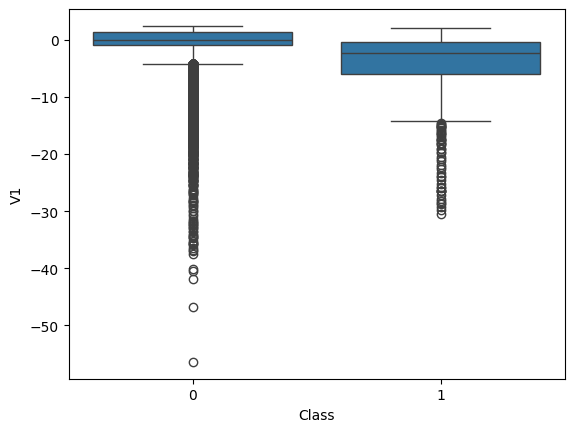

In [24]:
sns.boxplot(x = 'Class', y ='V1', data=dataset)


“There are basically three methods for treating outliers in a data set. One method is to remove outliers as a means of trimming the data set. Another method involves replacing the values of outliers or reducing the influence of outliers through outlier weight adjustments. The third method is used to estimate the values of outliers using robust techniques.” Kwak & Kim, 2017

# **Reducción de dimensionalidad**

Repetir la práctica con reducción de dimensionalidad (varianza, matriz de correlación y PCA) y comparar los resultados para todos los casos

## **Varianza**

## **Correlation matrix**

<Axes: >

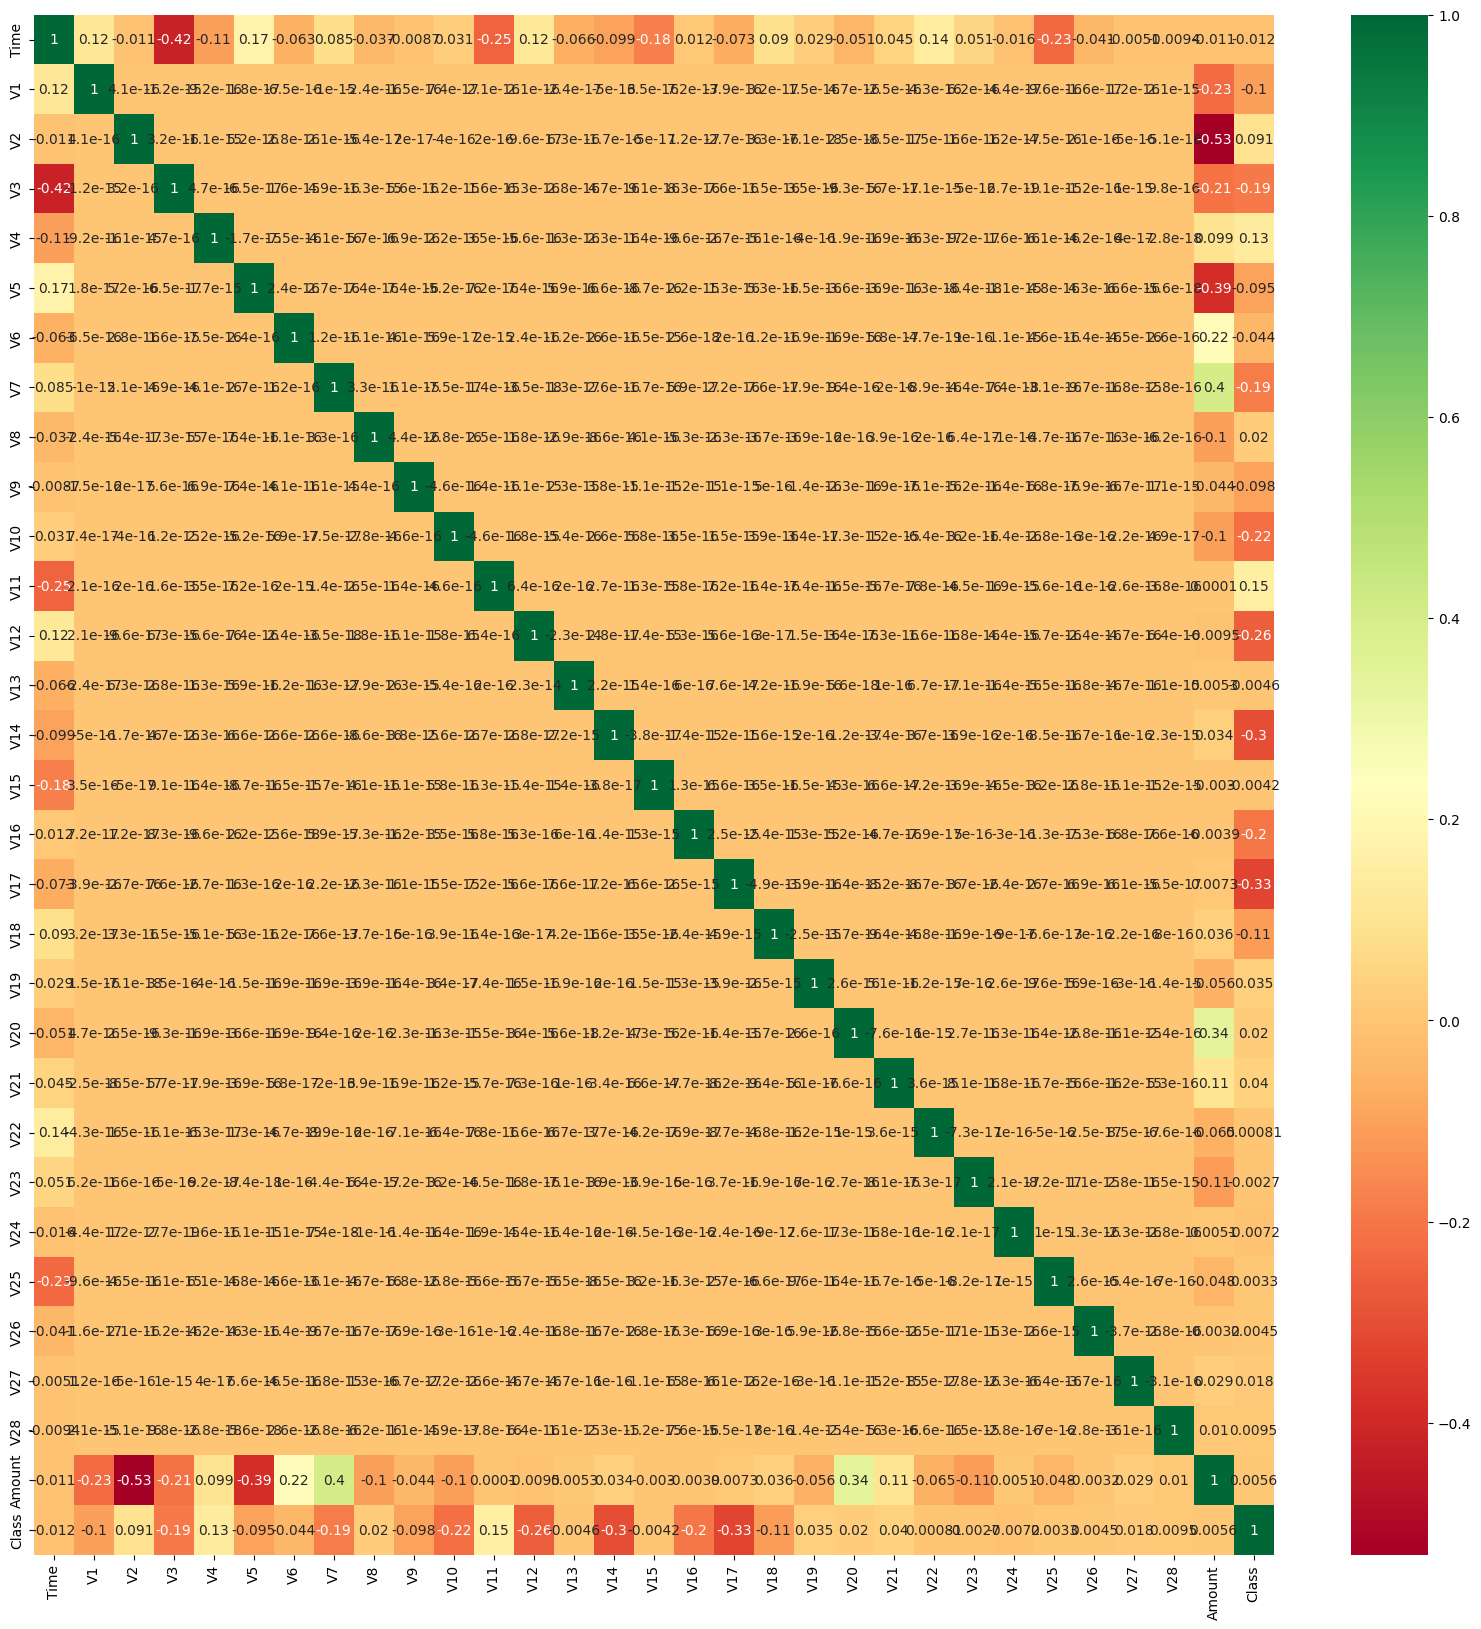

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn") 

## **PCA**

# **El dataset no está balanceado**
Ya que tenemos muy pocos casos de fraude por lo que el modelo puede no ser capaz de diferenciar entre fraude y correcto uso de la tarjeta.

In [26]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [27]:
nofraude = dataset[dataset.Class==0]
fraude = dataset[dataset.Class==1]
print(nofraude.shape)
print(fraude.shape)

(284315, 31)
(492, 31)


In [28]:
nofraude = nofraude.sample(n=324)
new_dataset = pd.concat([fraude, nofraude], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [29]:
new_dataset.shape

(816, 31)

# **Model Training**

## **Logistic Regression**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

X = new_dataset.drop(columns=['Class', 'Time'],axis=1)     
Y = new_dataset['Class'] 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(816, 29) (652, 29) (164, 29)


In [31]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [32]:
# Accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction,Y_train)

# Accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction,Y_test)

print('Accuracy on Training Data: ',training_data_accuracy)
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Training Data:  0.9432515337423313
Accuracy on Test Data:  0.9512195121951219


In [33]:
cm = metrics.confusion_matrix(Y_test, Y_test_prediction)
print(cm)

[[62  3]
 [ 5 94]]


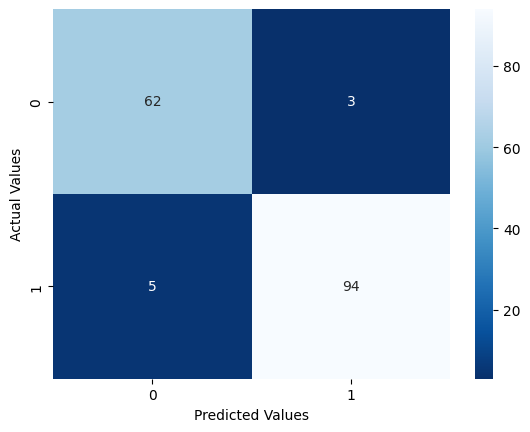

In [34]:
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [35]:
# ¿Qué pasa si no balanceamos?

inputs = dataset.drop("Class", axis="columns")
targets = dataset.Class
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=10)

model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
accuracy = accuracy_score(y_predicted, y_test)
print(accuracy)

0.9991222218320986


In [36]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[56854    14]
 [   36    58]]


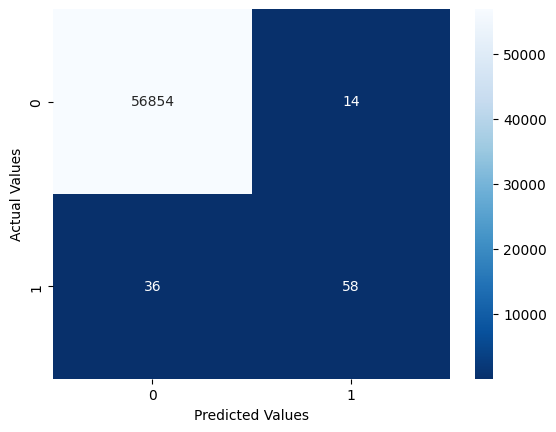

In [37]:
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

Tenemos más del 99% de accuracy sin hacer ningún balance, pero en la matriz de confusión vemos que de los 13 fraudes, 5 los considera como no fraude (62% accuracy). 

Vemos que nuestro modelo funciona para los no fraudes pero no va bien para los fraudes.

## **SVC (Support Vector Classification)**

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = new_dataset.drop(columns=['Class', 'Time'],axis=1)     
Y = new_dataset['Class'] 
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

clf = SVC(kernel='linear')
clf.fit(X_train_SVM,y_train_SVM)
y_pred_SVM = clf.predict(X_test_SVM)
print(accuracy_score(y_test_SVM,y_pred_SVM))

0.9451219512195121


## **Decision Tree**

In [39]:
X = new_dataset.drop(columns=['Class', 'Time'],axis=1)     
Y = new_dataset['Class'] 
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
! pip install graphviz

In [41]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(random_state=0)
#Entrenamos
clf = clf.fit(X_train_DT, y_train_DT)

In [42]:
y_pred_DT = clf.predict(X_test_DT)
y_pred_DT

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [43]:
print("Accuracy:", accuracy_score(y_pred_DT, y_test_DT))

Accuracy: 0.8902439024390244


[Text(0.4230769230769231, 0.875, 'x[13] <= -1.63\ngini = 0.479\nsamples = 652\nvalue = [259, 393]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= -1.119\ngini = 0.029\nsamples = 345\nvalue = [5, 340]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.375, 'x[10] <= -0.566\ngini = 0.017\nsamples = 343\nvalue = [3, 340]'),
 Text(0.15384615384615385, 0.125, '\n  (...)  \n'),
 Text(0.3076923076923077, 0.125, '\n  (...)  \n'),
 Text(0.6923076923076923, 0.625, 'x[3] <= 1.579\ngini = 0.286\nsamples = 307\nvalue = [254, 53]'),
 Text(0.5384615384615384, 0.375, 'x[7] <= -0.439\ngini = 0.181\nsamples = 259\nvalue = [233, 26]'),
 Text(0.46153846153846156, 0.125, '\n  (...)  \n'),
 Text(0.6153846153846154, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.375, 'x[9] <= 0.013\ngini = 0.492\nsamples = 48\nvalue = [21, 27]'),
 Text(0.7692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.125, '\n  (...)  \n')]

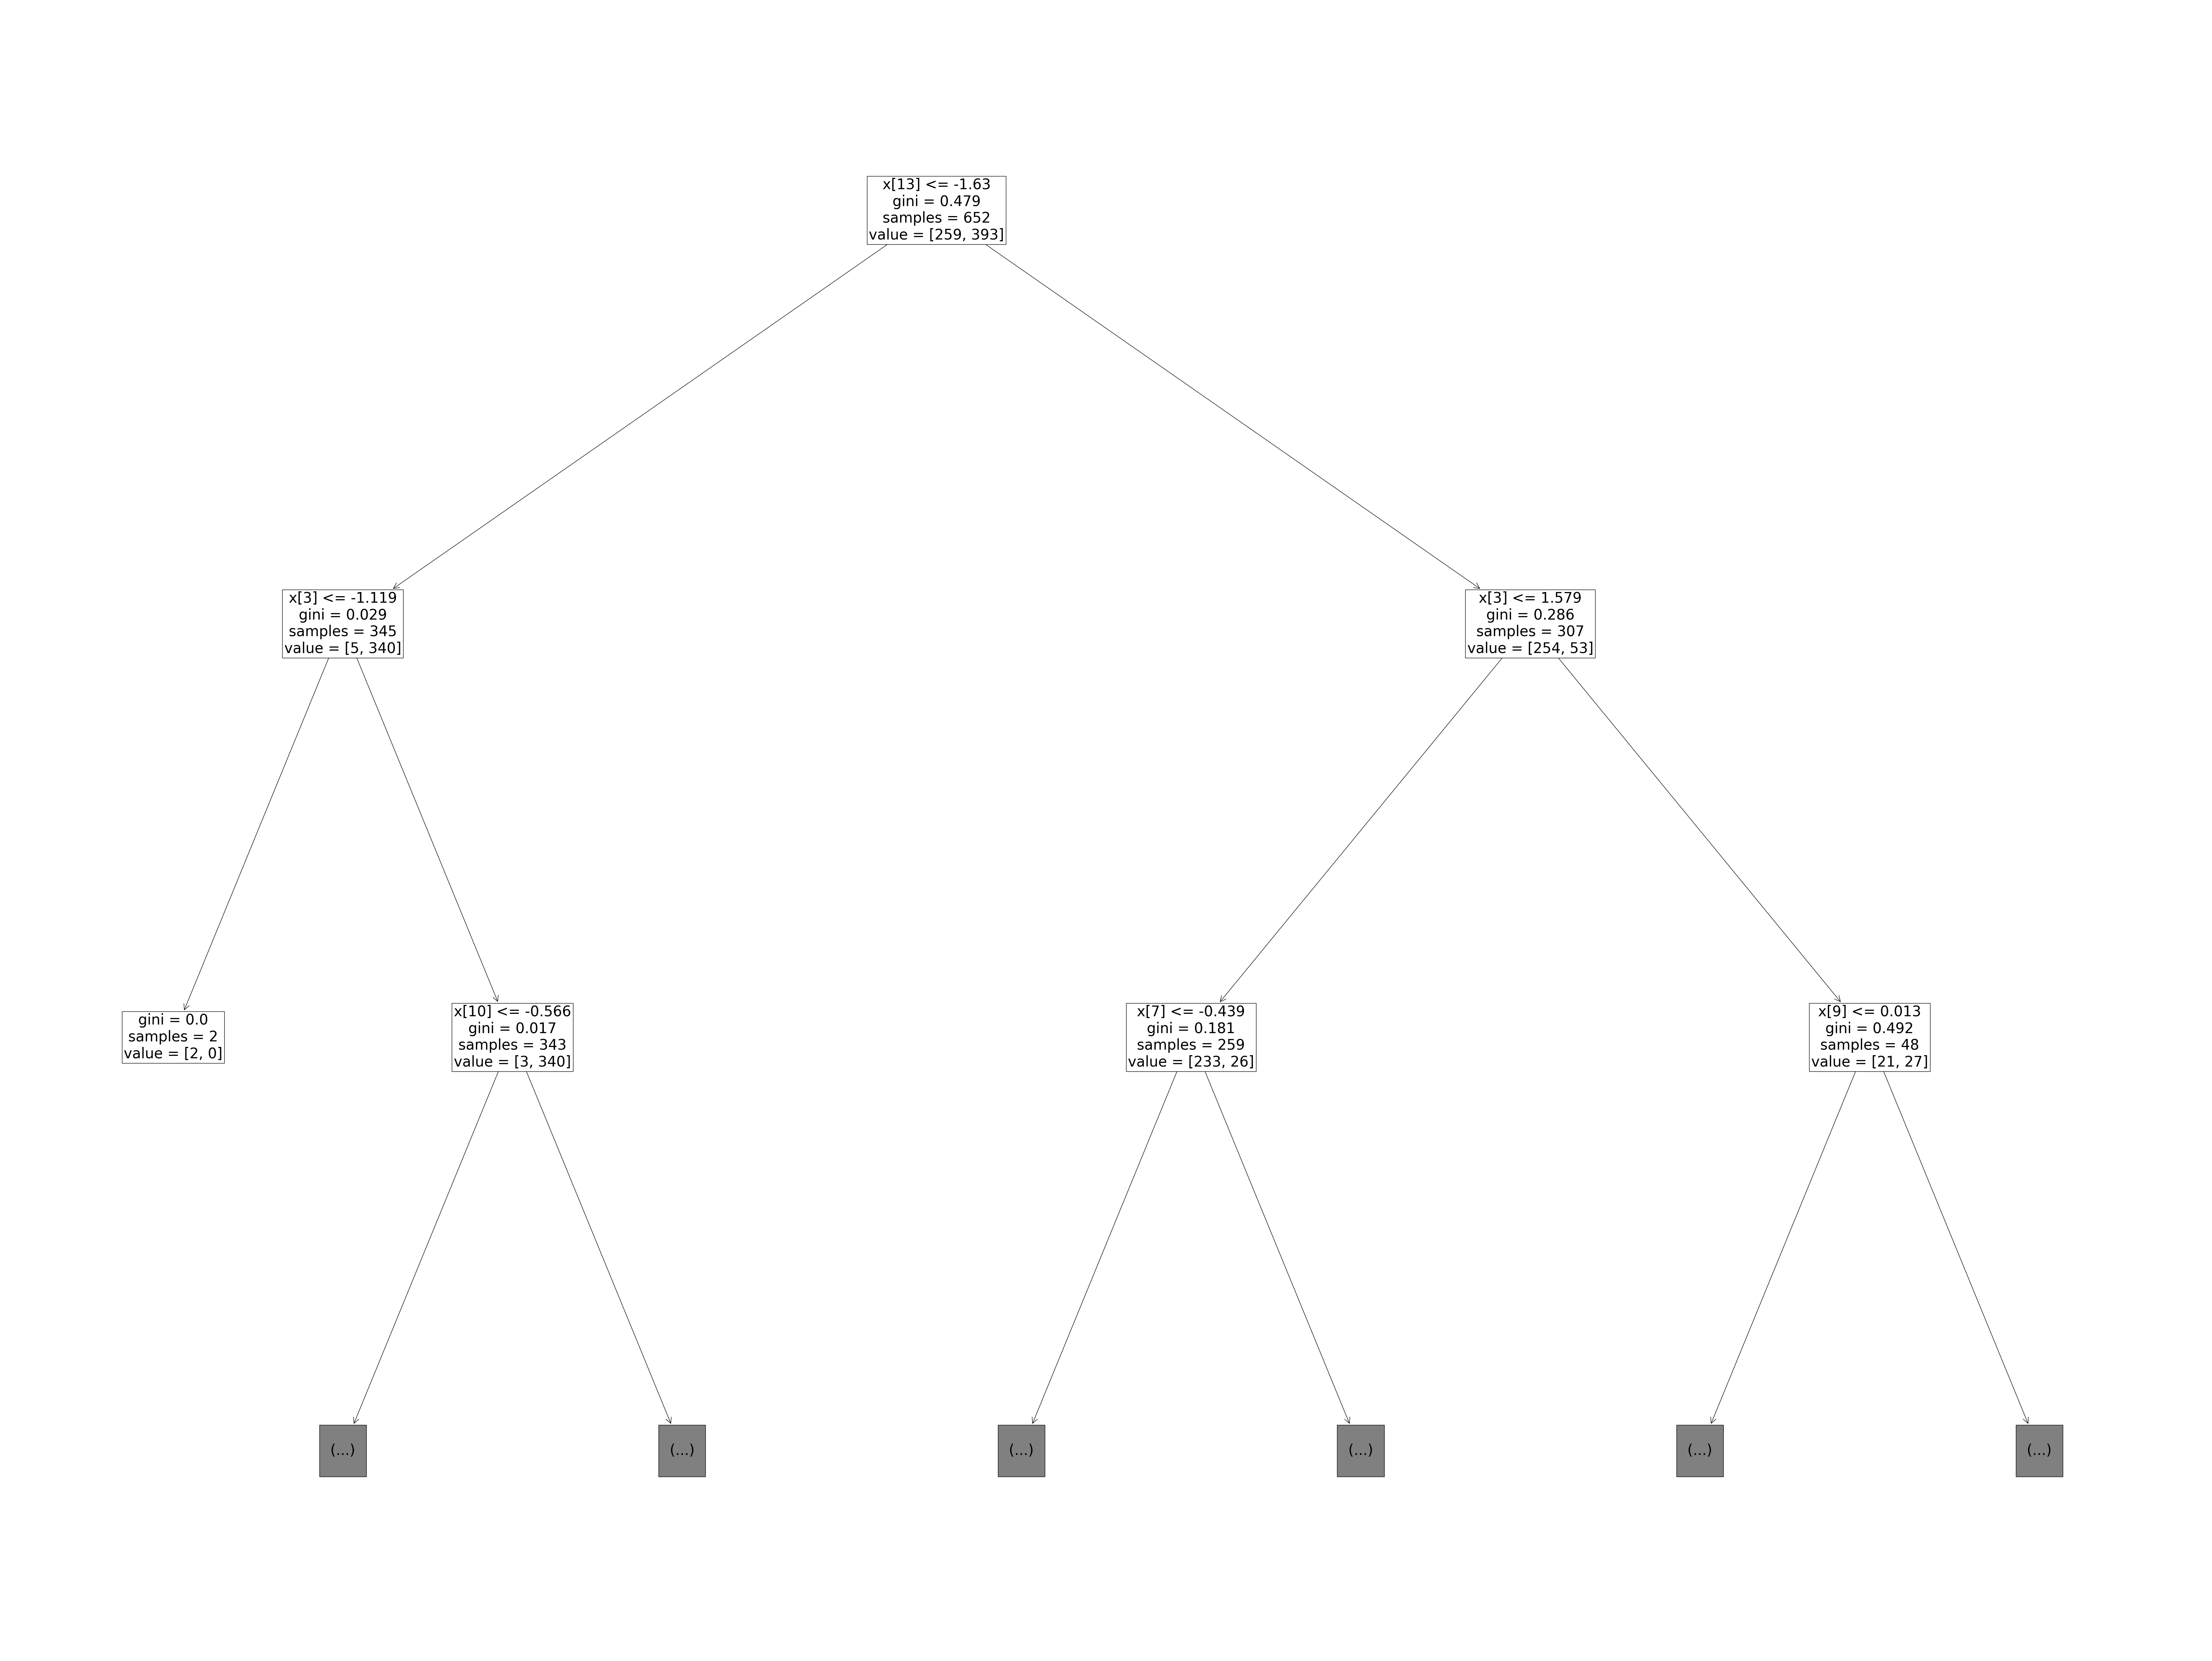

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,10,10])
tree.plot_tree(clf,fontsize=30,ax=ax,max_depth=2) 